#### <center>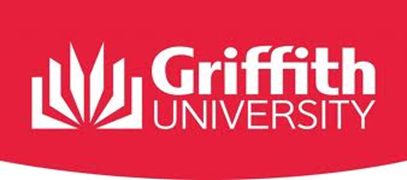</center>
<br>
<center><font size="10">3804ICT/3031ICT/7031ICT Data Mining</font></center> <br>
<center><font size="8">Workshop/Lab Week 6</font></center> <br><br>
<center><font size="6">by Dr Can Wang</font></center> <br><br>
<center><font size="6">Trimester 2, 2021</font></center> <br>

# Give short answers to the following questions [<font color=red>Individual Activity</font>]
## 1. Basic concepts of advanced topics on data mining: (15 mins)
<ol>
    <li>Please describe two processes of classification. (3 mins)</li> <br>
    <li>What measurements can be used to evaluate classification models? (3 mins)</li><br>
    <li>What are the differences between supervised and un-supervised learning methods? (1 mins)</li><br>
    <li>Please explain why we need training and test sets? (2 mins)</li><br> 
    <li>Please describe the motivation of cross-validation and how it is performed.(3 mins)</li> <br>
    <li>Briefly discuss underfitting and overfitting problems. (3 mins)</li> <br>    
</ol>


## 2. Discuss Assignment Part 1 (Project Proposal) with team members

# 3. Programming Task A. Use the existing supervised classifiers in Scikit library to perform binary classification on bank dataset: (50 mins)
There are 17 attributes in bank dataset and the last attribute "y" is the target attribute (label). 

a). You need to read the dataset and explore all the attributes in the dataset using python library pandas.

b). You may need to pre-process the raw features using what we have learned in Lecture 2 to ensure the data ready for the learning models.

c). To train your supervised learning models, you need to split the bank dataset into training and test sets (if you are not using cross-validation method, i.e. k-fold cross validation, you may need another validation set to choose the best parameters). 

d). Using scikit library, you need to implement the following classifiers: decision trees, naive bayes, k-nearest neighbour, and support vectore machine (linear).

e). Use accuracy as the evaluation metric and compare the performance differences between different models.

Note: please refer to the demo in Lecture 1 and the documentation on scikit website: http://scikit-learn.org/stable/documentation.html



In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import minmax_scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Implement your code below

In [10]:
df = pd.read_csv('/Users/javi/Desktop/GitHub/DATA_ANALYTICS/appliedDataMining/Lab3.1/bank(1).csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


AttributeError: 'DataFrame' object has no attribute 'split'

#  [Optional for 3031ICT/7031ICT]  4. Programming Task B. Use the existing unsupervised models in Scikit library to perform clustering analysis: (40 mins)

There are two datasets shown below. Perform K-Means and DBSCAN clustering algorithms on both datasets. Set k=4 for K-Means and radius=1, min_samples=5, and distance = 'euclidean'. You need to visualise the result by displaying different clusters using different colours. Discuss how different K-Means and DBSCAN are performed on different datasets.


Note: please refer to the documentation on scikit website: http://scikit-learn.org/stable/documentation.html


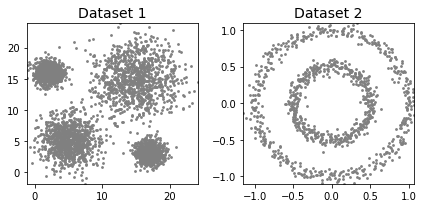

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


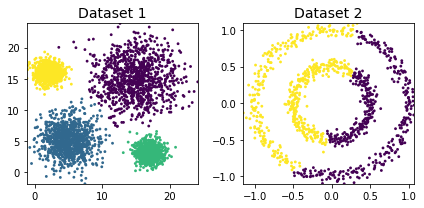

In [4]:
# Here is a sample of hierarchical clustering method performed on those two datasets.

hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)
